In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt

## **Detailed Explanation of the Online Foods Dataset**  

#### **1. General Description**  
The dataset contains information collected from an online foods ordering platform over a period of time. It encompasses various attributes related to Occupation, Family Size, Feedback etc..

This dataset can be utilized to explore the relationship between demographic/location factors and online food ordering behavior, analyze customer feedback to improve service quality, and potentially predict customer preferences or behavior based on demographic and location attributes.

#### **2. Columns in Dataset**
The following is a detailed description of the columns contained in the online foods dataset:

| Column      | Data Type |    Description                                                 |
|------------|-----------|--------------------------------------------------------------|
| `Age`     | int    | Age of the customer                 |
| `Gender`      | object     | Gender of the customer                               |
| `Marital Status`    | object      | Marital Status of the customer               |
| `Occupation`    | object       | Occupation of the customer                         |
| `Monthly Income`     | Object     | Monthly Income of the customer                                    |
| `Educational Qualifications` | object    | Educational Qualifications of the customer  |
|`Family size`  | int | Number of individuals in the customer's family  |
|`latitude` | float | Latitude of the customer's location |
|`longitude`| float | Longitude of the customer's location |
|`Pin code`| int |  Pin code of the customer's location  |
|`Output` | object  |  Current status of the order (e.g., pending, confirmed, delivered) |
|`Feedback`| object  | Feedback provided by the customer after receiving the order |

---

#### **3. Tipe Variabel**
- **Numerical Variables:** `Age`, `Family size`, `Latitude`, `Longitude`, `Pin code`
- **Categorical Variables:** `Gender`, `Marital Status`, `Occupation`, `Monthly Income`, `Educational Qualifications`, `Output`, `Feedback`



---

#### **Sumber Dataset**
- **Kaggle Online Food Dataset:** [https://www.kaggle.com/datasets/sudarshan24byte/online-food-datasetv]





#### **5. Descriptive Statistics**
- Total orders: 285
- Total Positive feedback: 231
- Negative feedback:54

---

#### **6. Initial Insights**
- The highest number of orders come from students.
- Geospatial analysis of latitude and longitude indicates that the highest density of customer locations is centered near the urban core.
- Approximately 81.1% of customers responded with positive feedback, indicating a high level of satisfaction


In [ ]:
# 1. Load Public Dataset
online_foods = pd.read_csv('/content/onlinefoods.csv')
print("== Data Head ==")
print(online_foods.head())

== Data Head ==
   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback Unnamed: 12  
0    Yes   Positive         Yes  
1    Yes   Positive         Yes  
2    Yes  Negative          Yes  
3    Yes   Positive         Ye

In [ ]:
online_foods

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes


In [ ]:
online_foods.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output', 'Feedback', 'Unnamed: 12'],
      dtype='object')

In [ ]:
online_foods['Unnamed: 12'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
online_foods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [ ]:
print("Missing values before cleaning :")
online_foods.isnull().sum()

Missing values before cleaning :


,0
Age,0
Gender,0
Marital Status,0
Occupation,0
Monthly Income,0
Educational Qualifications,0
Family size,0
latitude,0
longitude,0
Pin code,0


In [ ]:
#duplicated data
online_foods.duplicated().sum()


np.int64(103)

In [ ]:
#drop unknown column
online_foods.drop('Unnamed: 12', axis=1, inplace=True)

In [ ]:
online_foods_clean = online_foods.drop_duplicates()
print(online_foods_clean)

     Age  Gender Marital Status Occupation   Monthly Income  \
0     20  Female         Single    Student        No Income   
1     24  Female         Single    Student   Below Rs.10000   
2     22    Male         Single    Student   Below Rs.10000   
3     22  Female         Single    Student        No Income   
4     22    Male         Single    Student   Below Rs.10000   
..   ...     ...            ...        ...              ...   
355   21    Male         Single    Student        No Income   
363   31    Male        Married   Employee  More than 50000   
369   30    Male        Married   Employee  More than 50000   
374   21    Male         Single    Student        No Income   
386   23    Male         Single    Student   Below Rs.10000   

    Educational Qualifications  Family size  latitude  longitude  Pin code  \
0                Post Graduate            4   12.9766    77.5993    560001   
1                     Graduate            3   12.9770    77.5773    560009   
2        

In [ ]:
#duplicated data
online_foods_clean.duplicated().sum()


np.int64(0)

In [ ]:
# Categorical vs. Numerical Variables
# Identifying categorical and numerical columns.
categorical_cols = online_foods_clean.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = online_foods_clean.select_dtypes(include=['number']).columns.tolist()
print("\nCategorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)


Categorical columns: ['Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications', 'Output', 'Feedback']
Numerical columns: ['Age', 'Family size', 'latitude', 'longitude', 'Pin code']


In [ ]:
online_foods_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,285.0,24.677193,3.040977,18.0000,23.0000,24.0000,26.0000,33.0000
Family size,285.0,3.270175,1.361178,1.0000,2.0000,3.0000,4.0000,6.0000
latitude,285.0,12.973429,0.043964,12.8652,12.9438,12.9770,12.9980,13.1020
longitude,285.0,77.597593,0.053557,77.4842,77.5635,77.5877,77.6227,77.7582
Pin code,285.0,560037.280702,30.738306,560001.0000,560010.0000,560028.0000,560066.0000,560109.0000


Normalisasi Data

In [ ]:
online_foods_clean['latitude'].unique()

array([12.9766, 12.977 , 12.9551, 12.9473, 12.985 , 12.9299, 12.9828,
       12.9854, 12.8988, 12.9438, 12.8893, 12.9783, 12.982 , 13.0298,
       12.9983, 12.9925, 12.9306, 12.9353, 12.9155, 13.0019, 12.9698,
       12.9261, 12.9119, 12.9662, 12.9565, 13.0206, 12.9635, 13.0067,
       12.8845, 13.0158, 12.9343, 13.0012, 12.9442, 13.0487, 12.9889,
       12.9335, 13.102 , 12.9048, 12.9337, 12.9037, 13.0289, 12.9561,
       12.9579, 13.014 , 13.0138, 12.9537, 12.998 , 13.0496, 13.0166,
       13.0503, 12.9883, 13.0626, 12.957 , 12.8652, 12.9757, 12.9621,
       12.9217, 13.0223, 13.0262, 13.0078, 12.9105, 12.8834, 12.9149,
       12.9706, 13.0103, 13.0641, 12.9369, 13.0809, 12.9859, 12.9866,
       12.9847, 12.989 , 12.9251, 12.9967, 13.0734, 12.9515, 12.9719])

In [ ]:
online_foods_clean['longitude'].unique()

array([77.5993, 77.5773, 77.6593, 77.5616, 77.5533, 77.6848, 77.6131,
       77.7081, 77.5764, 77.5738, 77.6399, 77.6408, 77.6256, 77.6047,
       77.6409, 77.5633, 77.5434, 77.5585, 77.5135, 77.5713, 77.75  ,
       77.6221, 77.6446, 77.6068, 77.5484, 77.6479, 77.5821, 77.545 ,
       77.6036, 77.539 , 77.6044, 77.5995, 77.6076, 77.5923, 77.5741,
       77.5691, 77.5864, 77.6821, 77.59  , 77.5376, 77.54  , 77.5921,
       77.6309, 77.5658, 77.5877, 77.6176, 77.6227, 77.4941, 77.6804,
       77.5529, 77.5987, 77.5284, 77.5637, 77.524 , 77.5586, 77.5936,
       77.7132, 77.62  , 77.5577, 77.4842, 77.5486, 77.5635, 77.6529,
       77.5796, 77.5931, 77.6407, 77.5565, 77.6713, 77.4904, 77.5491,
       77.5332, 77.4992, 77.7582, 77.5464, 77.4921, 77.5128])

In [ ]:
#Show Numeric and Categorical Features separately

online_foods_clean_numeric = online_foods_clean[['Age', 'Family size', 'latitude', 'longitude']]

online_foods_clean_categorical = online_foods_clean[['Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications', 'Output', 'Feedback']]

In [ ]:
online_foods_clean_categorical_list = [online_foods_clean['Gender'], online_foods_clean['Marital Status'], online_foods_clean['Occupation'], online_foods_clean['Monthly Income'],
                        online_foods_clean['Educational Qualifications'], online_foods_clean['Output'], online_foods_clean['Feedback']]

for i in online_foods_clean_categorical_list:
    print('unique values: ', i.unique())
    print('count of unique values: ', i.nunique())
    print()
    print('value counts: ')
    print(i.value_counts())
    print()
    print('by percentage: ')
    print(i.value_counts(normalize = True).round(2))
    print('-------------------------')

unique values:  ['Female' 'Male']
count of unique values:  2

value counts: 
Gender
Male      164
Female    121
Name: count, dtype: int64

by percentage: 
Gender
Male      0.58
Female    0.42
Name: proportion, dtype: float64
-------------------------
unique values:  ['Single' 'Married' 'Prefer not to say']
count of unique values:  3

value counts: 
Marital Status
Single               189
Married               87
Prefer not to say      9
Name: count, dtype: int64

by percentage: 
Marital Status
Single               0.66
Married              0.31
Prefer not to say    0.03
Name: proportion, dtype: float64
-------------------------
unique values:  ['Student' 'Employee' 'Self Employeed' 'House wife']
count of unique values:  4

value counts: 
Occupation
Student           144
Employee           94
Self Employeed     38
House wife          9
Name: count, dtype: int64

by percentage: 
Occupation
Student           0.51
Employee          0.33
Self Employeed    0.13
House wife        0.03
Name: p

# customer ID to create customer with repeat order

In [ ]:
customers_online_foods = online_foods_clean.copy()

# Dropping Order-specific Features
customers_online_foods = customers_online_foods.drop(['Output', 'Feedback'], axis=1, errors='ignore')

print(customers_online_foods.head())
print("number of orders: ", len(customers_online_foods))

   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  
0              Post Graduate            4   12.9766    77.5993    560001  
1                   Graduate            3   12.9770    77.5773    560009  
2              Post Graduate            3   12.9551    77.6593    560017  
3                   Graduate            6   12.9473    77.5616    560019  
4              Post Graduate            4   12.9850    77.5533    560010  
number of orders:  285


In [ ]:
# Drop duplicates from the DataFrame
unique_customers_online_foods = customers_online_foods.drop_duplicates()

# Create 'Customer ID' by assigning unique values
unique_customers_online_foods['Customer ID'] = range(1, len(unique_customers_online_foods) + 1)

print("number of Customers: ", len(unique_customers_online_foods), "\n")
print(unique_customers_online_foods.head())

number of Customers:  279 

   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

   Customer ID  
0            1  
1            2  
2            3  
3            4  
4            5  


/tmp/ipython-input-3842439134.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_customers_online_foods['Customer ID'] = range(1, len(unique_customers_online_foods) + 1)


In [ ]:
# check /avoid duplicates for th condition:
duplicates = unique_customers_online_foods.duplicated(subset=['latitude', 'longitude', 'Pin code'], keep=False)

# Display rows with duplicates
duplicate_rows = unique_customers_online_foods[duplicates]

# [261 rows x 12 columns] ( including 'Unnamed 12' - not sure if it is Order-specific feature)

# Ensure there are no duplicates in unique_customers_online_foods based on location
unique_customers_online_foods = unique_customers_online_foods.drop_duplicates(subset=['latitude', 'longitude', 'Pin code'])

# Merge based on the Customer specific features
online_foods_with_customer_id = online_foods_clean.merge(
    unique_customers_online_foods[['latitude', 'longitude', 'Pin code', 'Customer ID']],
    on=['latitude', 'longitude', 'Pin code'],
    how='left' # Use a left merge to keep all rows from online_foods_clean
)

# Display the first few rows to verify the merge
display(online_foods_with_customer_id.head())

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Customer ID
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,1
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,2
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,3
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,4
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,5


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 10))
online_foods_clean[['Age_Normalized', 'Family_size_Normalized']] = scaler.fit_transform(online_foods_clean[['Age', 'Family size']])
display(online_foods_clean[['Age', 'Age_Normalized', 'Family size', 'Family_size_Normalized']].head())

/tmp/ipython-input-624882482.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_foods_clean[['Age_Normalized', 'Family_size_Normalized']] = scaler.fit_transform(online_foods_clean[['Age', 'Family size']])
/tmp/ipython-input-624882482.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_foods_clean[['Age_Normalized', 'Family_size_Normalized']] = scaler.fit_transform(online_foods_clean[['Age', 'Family size']])


,Age,Age_Normalized,Family size,Family_size_Normalized
0,20,1.333333,4,6.0
1,24,4.000000,3,4.0
2,22,2.666667,3,4.0
3,22,2.666667,6,10.0
4,22,2.666667,4,6.0


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 10))
online_foods_clean[['Pin_code_Normalized', 'latitude_Normalized']] = scaler.fit_transform(online_foods_clean[['Pin code', 'latitude']])
display(online_foods_clean[['Pin code', 'Pin_code_Normalized', 'latitude', 'latitude_Normalized']].head())

/tmp/ipython-input-123438541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_foods_clean[['Pin_code_Normalized', 'latitude_Normalized']] = scaler.fit_transform(online_foods_clean[['Pin code', 'latitude']])
/tmp/ipython-input-123438541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_foods_clean[['Pin_code_Normalized', 'latitude_Normalized']] = scaler.fit_transform(online_foods_clean[['Pin code', 'latitude']])


,Pin code,Pin_code_Normalized,latitude,latitude_Normalized
0,560001,0.000000,12.9766,4.704392
1,560009,0.740741,12.9770,4.721284
2,560017,1.481481,12.9551,3.796453
3,560019,1.666667,12.9473,3.467061
4,560010,0.833333,12.9850,5.059122


# **Visualization**

In [ ]:
#Show Numeric and Categorical Features separately

online_foods_clean_numeric = online_foods_clean[['Age', 'Family size', 'latitude', 'longitude']]

online_foods_clean_categorical = online_foods_clean[['Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications', 'Output', 'Feedback']]

Show Distributions of Numeric Features

In [ ]:
online_foods_clean_numeric.columns

Index(['Age', 'Family size', 'latitude', 'longitude'], dtype='object')

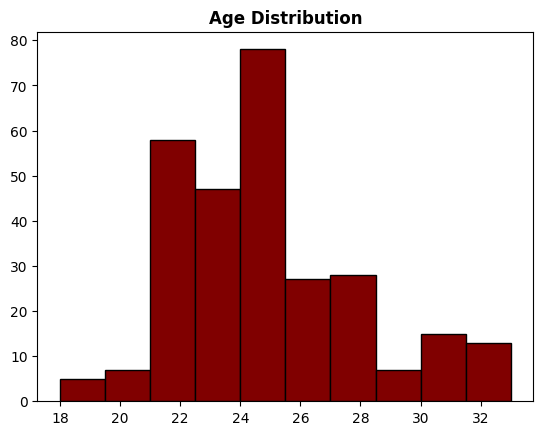

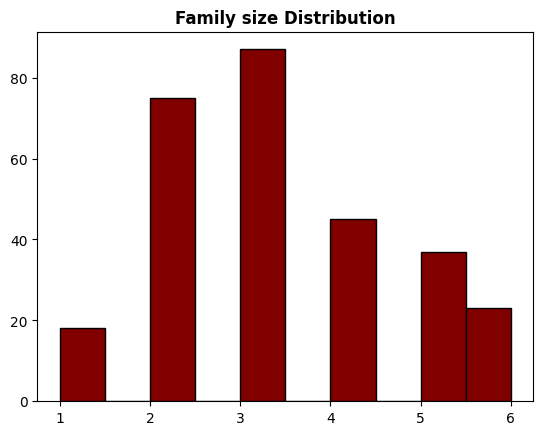

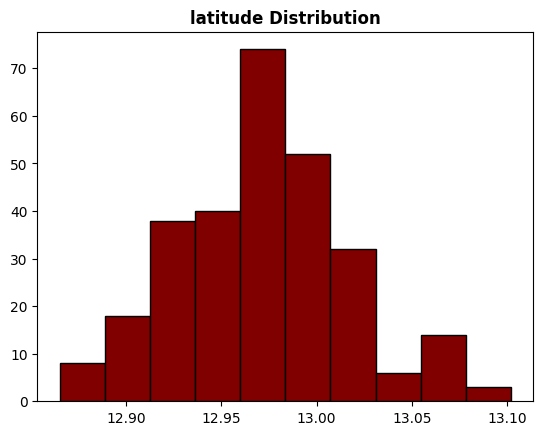

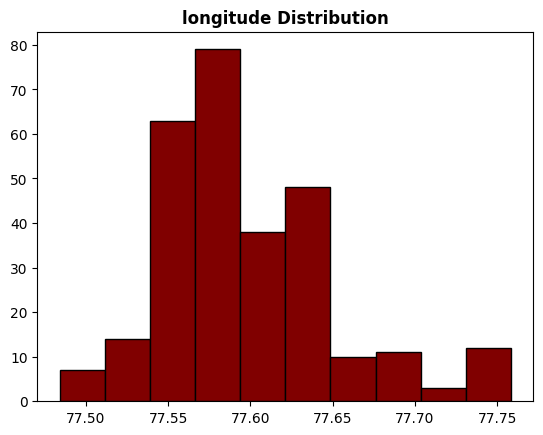

In [ ]:
for i in online_foods_clean_numeric.columns:
    plt.hist(x = online_foods_clean_numeric[i], color = 'maroon', edgecolor = 'black')
    plt.title(i + ' Distribution', weight = 'bold')
    plt.show()
    print()

Bivariate Analysis for Numerical Data

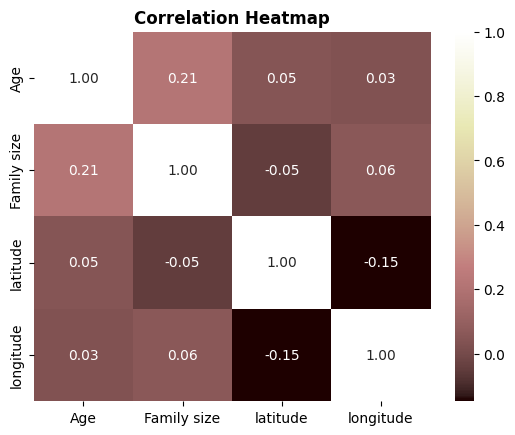

In [ ]:
#Correlation Heatmap of Numerical Variables
sns.heatmap(data = online_foods_clean_numeric.corr(), annot = True, fmt = '.2f',  cmap = "pink")

plt.title('Correlation Heatmap', weight = 'bold')

plt.show()

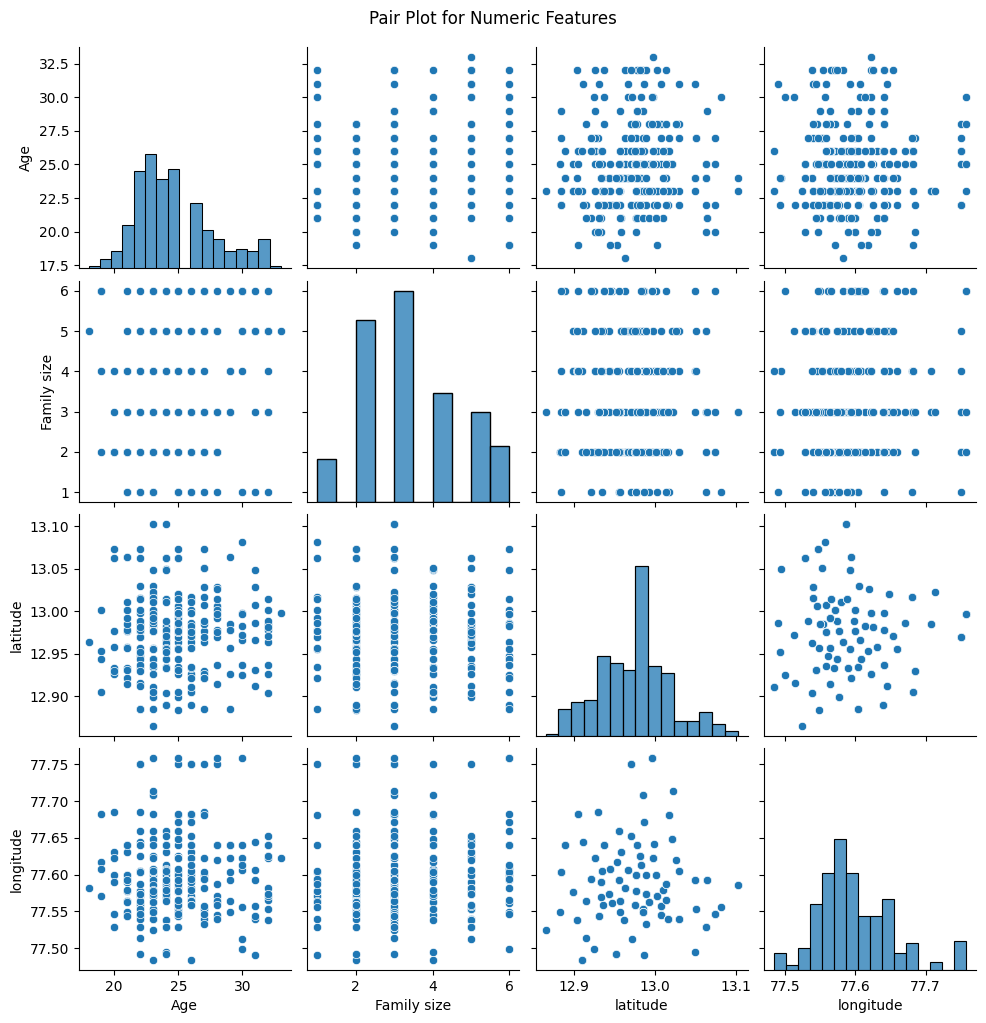

In [ ]:
# Pair Plot for numeric features
sns.pairplot(online_foods_clean_numeric)
plt.suptitle('Pair Plot for Numeric Features', y=1.02)
plt.show()

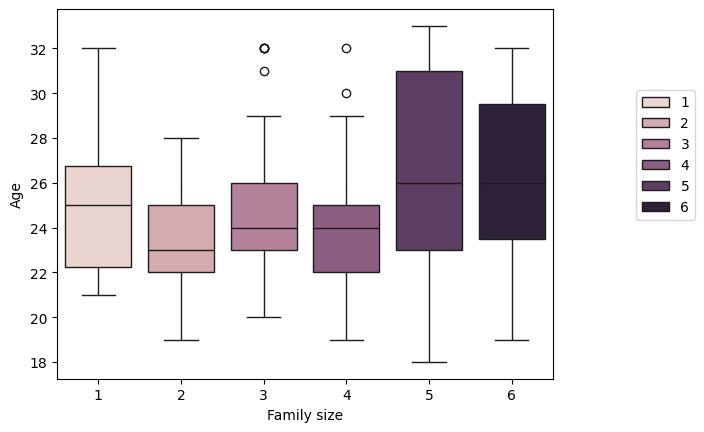

In [ ]:
#Age and Family size Relationship (Numerical)
sns.boxplot(data = online_foods_clean , x = online_foods_clean['Family size'], y = online_foods_clean.Age, hue = online_foods_clean['Family size'])
plt.legend(bbox_to_anchor = (1.3,0.8))

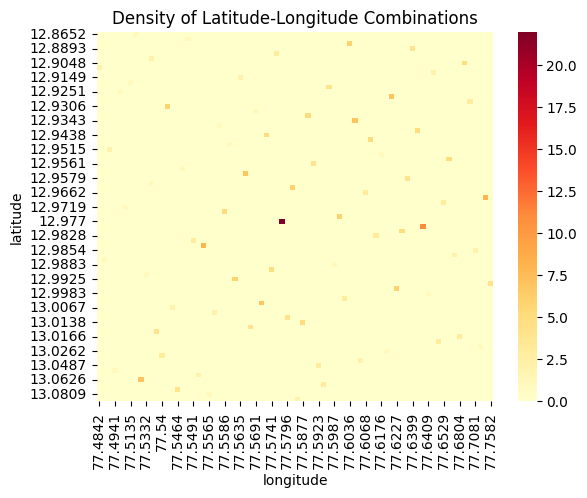

In [ ]:
#Show where the most frequent locations are.
sns.heatmap(Latitude_Longitude_counts, cmap='YlOrRd')
plt.title("Density of Latitude-Longitude Combinations")
plt.show()


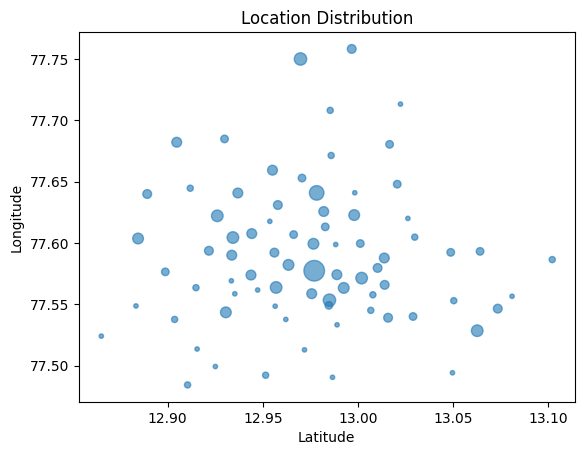

In [ ]:
#Show spatial distribution without frequency emphasis
latitudes, longitudes, counts = [], [], []
for lat in Latitude_Longitude_counts.index:
    for lon in Latitude_Longitude_counts.columns:
        count = Latitude_Longitude_counts.loc[lat, lon]
        if count > 0:
            latitudes.append(lat)
            longitudes.append(lon)
            counts.append(count)

plt.scatter(latitudes, longitudes, s=np.array(counts)*10, alpha=0.6)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Location Distribution")
plt.show()

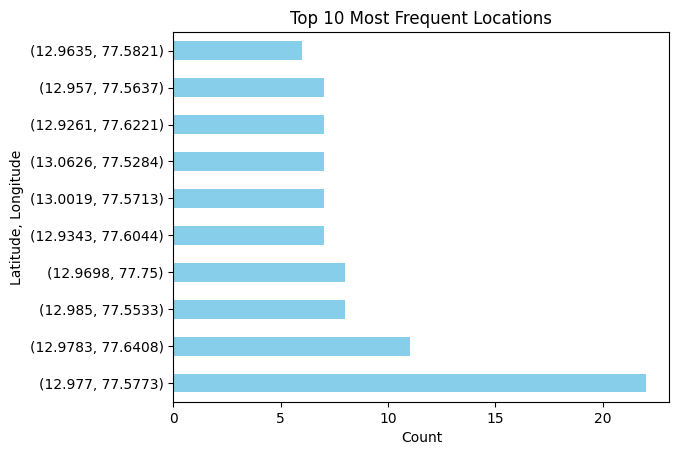

In [ ]:
#Show which lat-lon pairs are most common.
flat_counts = Latitude_Longitude_counts.stack().sort_values(ascending=False)
flat_counts.head(10).plot(kind='barh', color='skyblue')
plt.title("Top 10 Most Frequent Locations")
plt.xlabel("Count")
plt.ylabel("Latitude, Longitude")
plt.show()


Bivariate Analysis for Categorical Data

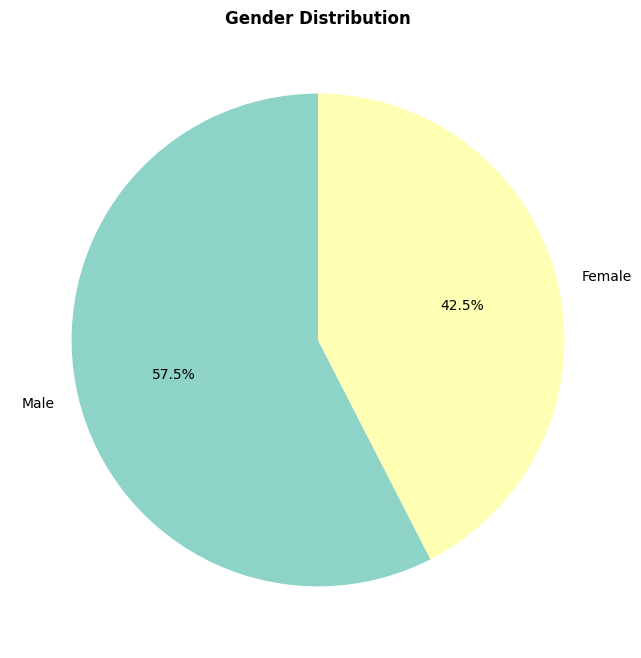

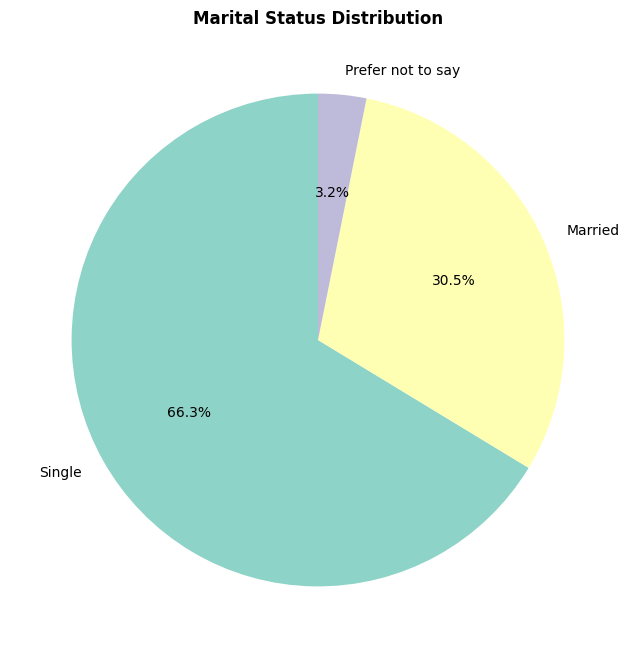

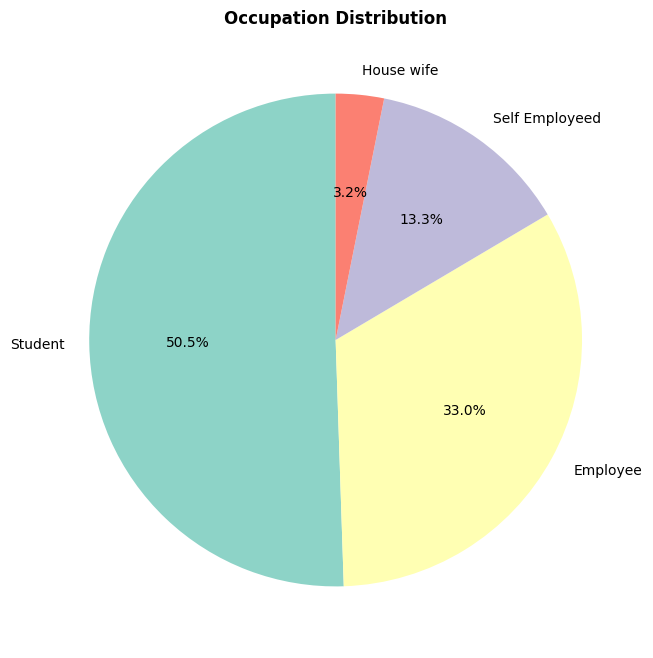

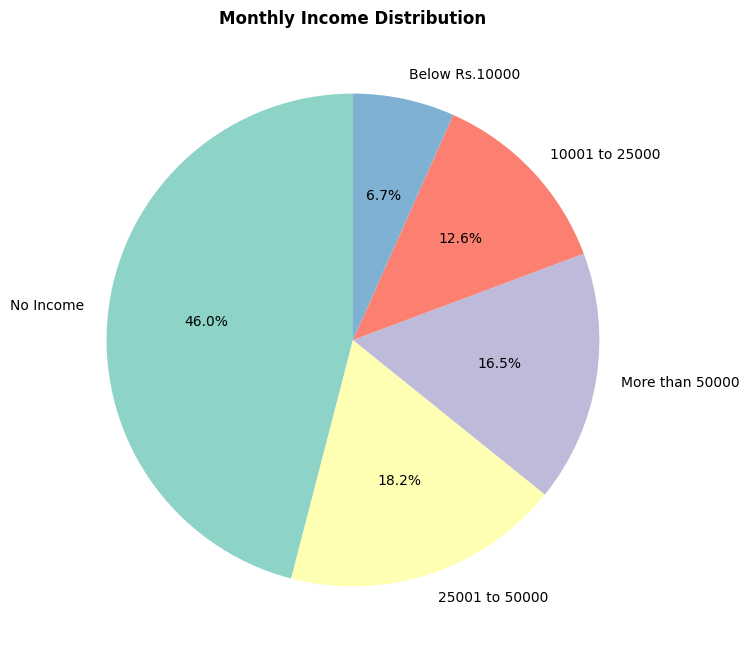

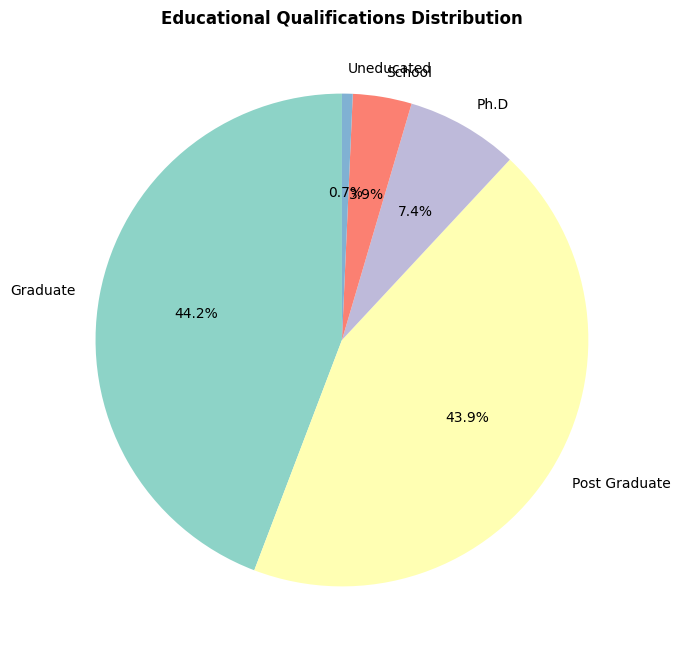

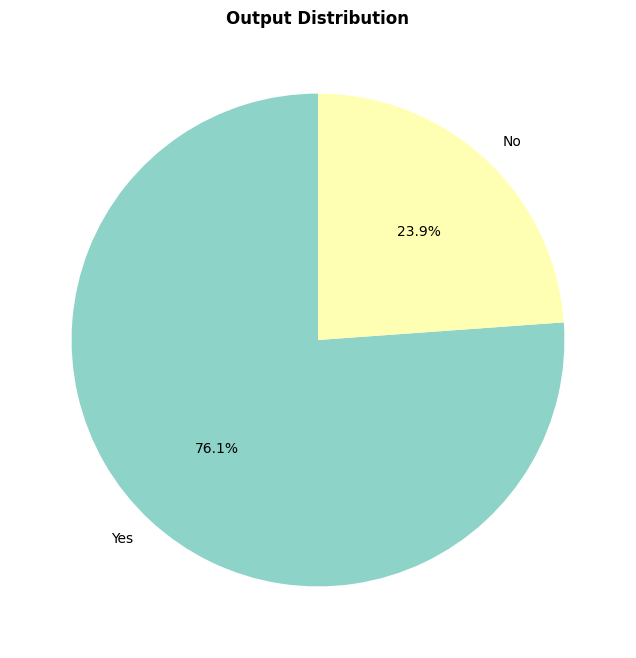

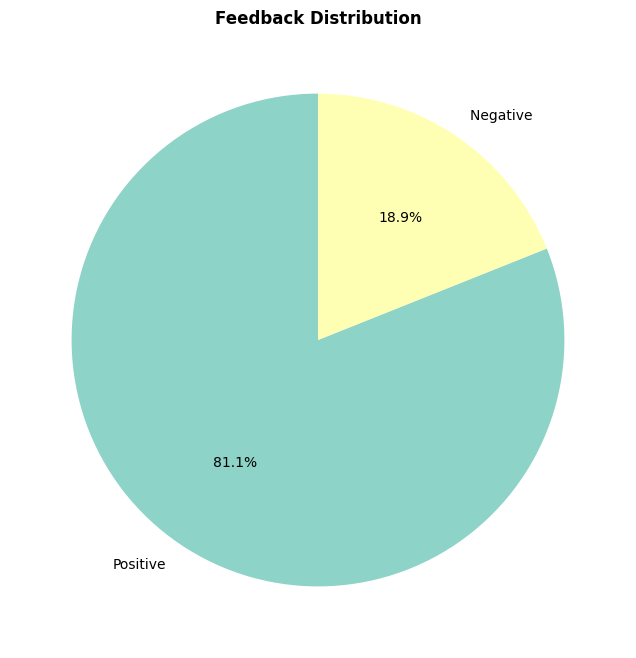

In [ ]:
for col in online_foods_clean_categorical.columns:
    plt.figure(figsize=(8, 8))
    plt.pie(online_foods_clean_categorical[col].value_counts(), labels=online_foods_clean_categorical[col].value_counts().index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))
    plt.title(col + ' Distribution', weight = 'bold')
    plt.show()
    print()

In [ ]:
online_foods_clean_categorical.columns

Index(['Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Output', 'Feedback'],
      dtype='object')

Categorical Features - 'Feedback'(target) Relationship

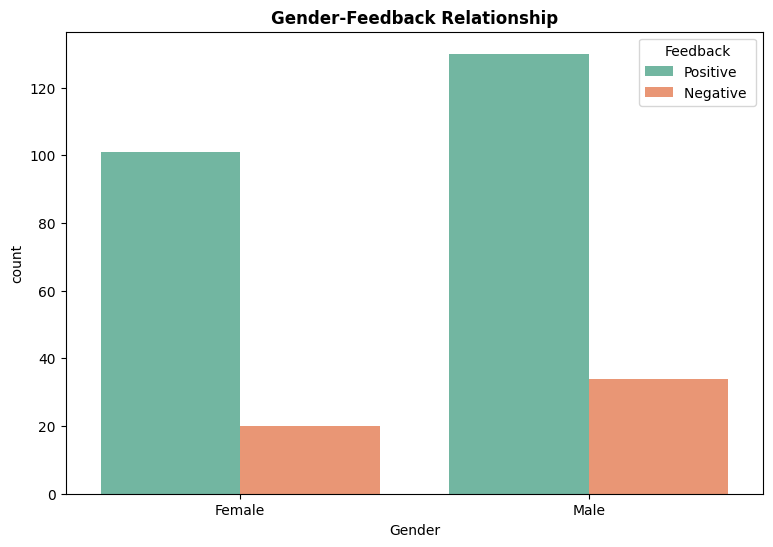

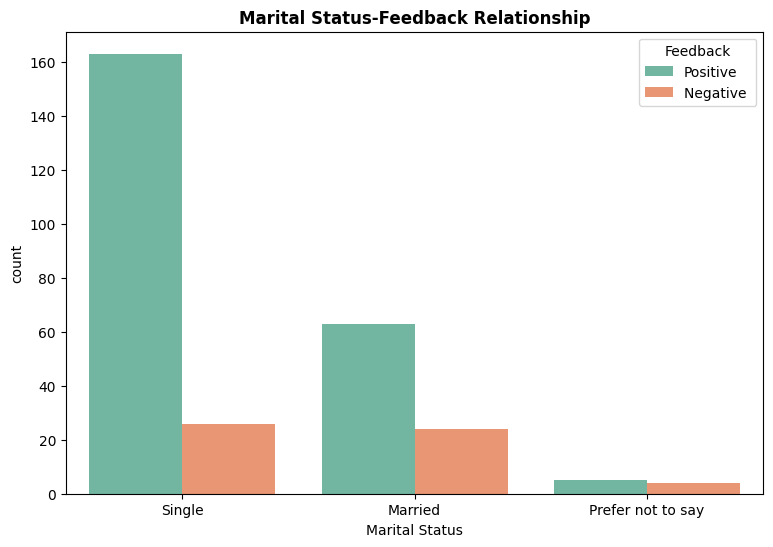

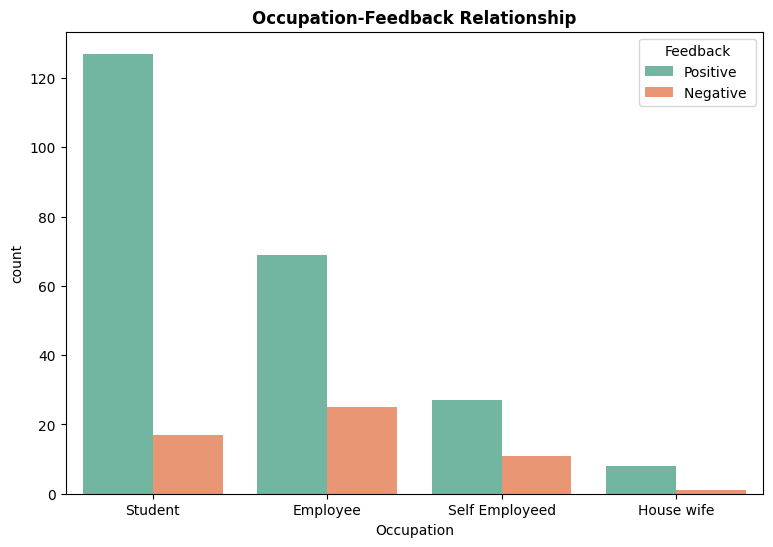

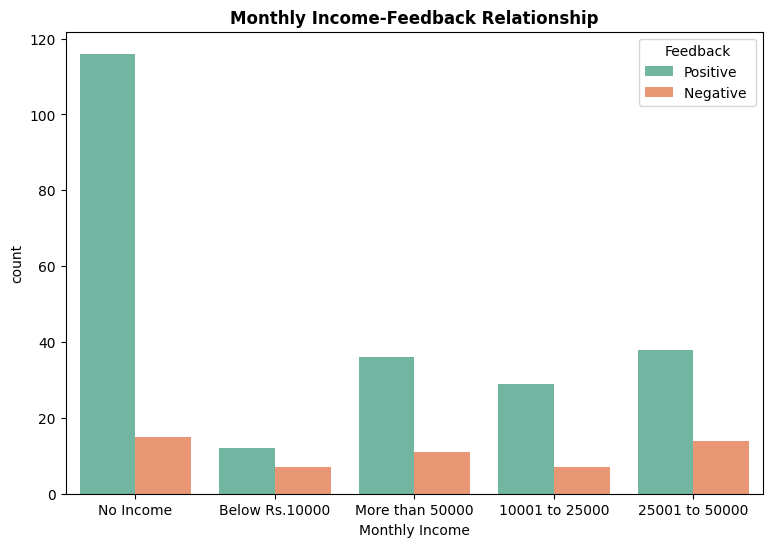

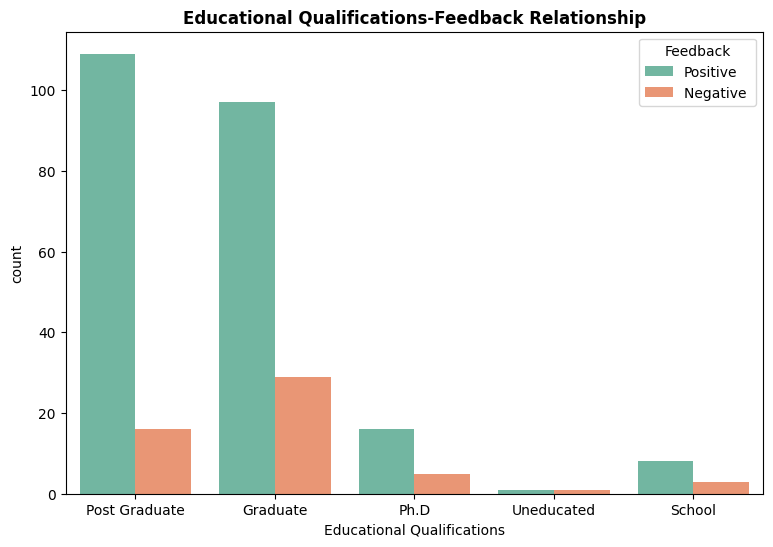

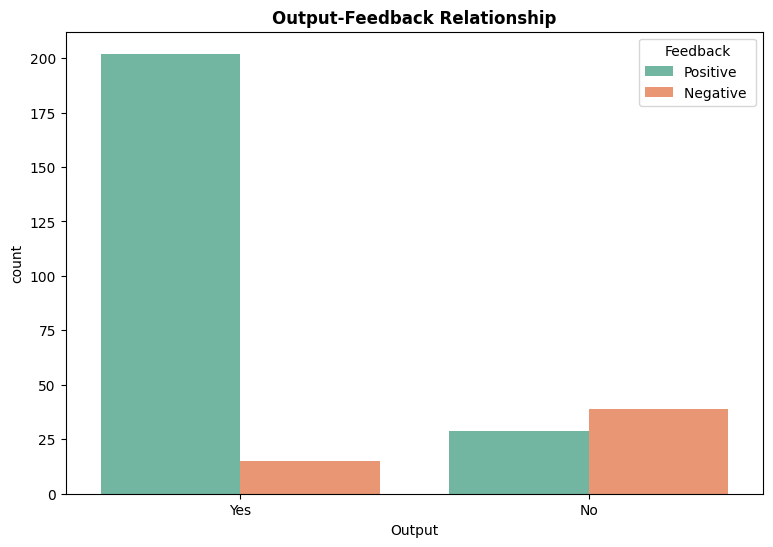

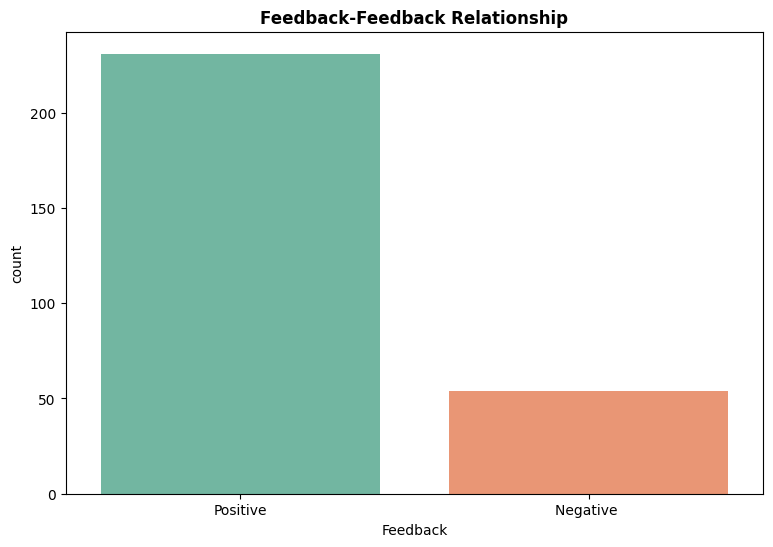

In [ ]:
for i in online_foods_clean_categorical.columns:
    plt.figure(figsize = (9,6))
    plt.title(i + '-Feedback Relationship', weight = 'bold')
    sns.countplot(x = online_foods_clean_categorical[i], hue = online_foods_clean['Feedback'], palette = 'Set2')
    plt.show()
    print()

In [ ]:
map = folium.Map(location=[12.8988, 77.5764], zoom_start=13)

In [ ]:
heatmap_data = online_foods_clean[['latitude', 'longitude']].values.tolist()
HeatMap(heatmap_data, radius=15).add_to(map)

In [ ]:
# Add Clustered Marker layer
from folium.plugins import MarkerCluster
marker_cluster = MarkerCluster().add_to(map)
for index, row in online_foods_clean.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=row['Occupation'] + ': ' + row['Output']).add_to(marker_cluster)

In [ ]:
map

In [ ]:
##'Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
##       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
#       'Pin code', 'Output', 'Feedback', 'Unnamed: 12'],
#      dtype='object')

y_train dtype before fit: int64
y_train unique values before fit: [0 1]
Accuracy of the Random Forest Classifier: 0.8070

Classification Report:
              precision    recall  f1-score   support

    Negative       0.17      0.14      0.15         7
    Positive       0.88      0.90      0.89        50

    accuracy                           0.81        57
   macro avg       0.52      0.52      0.52        57
weighted avg       0.79      0.81      0.80        57



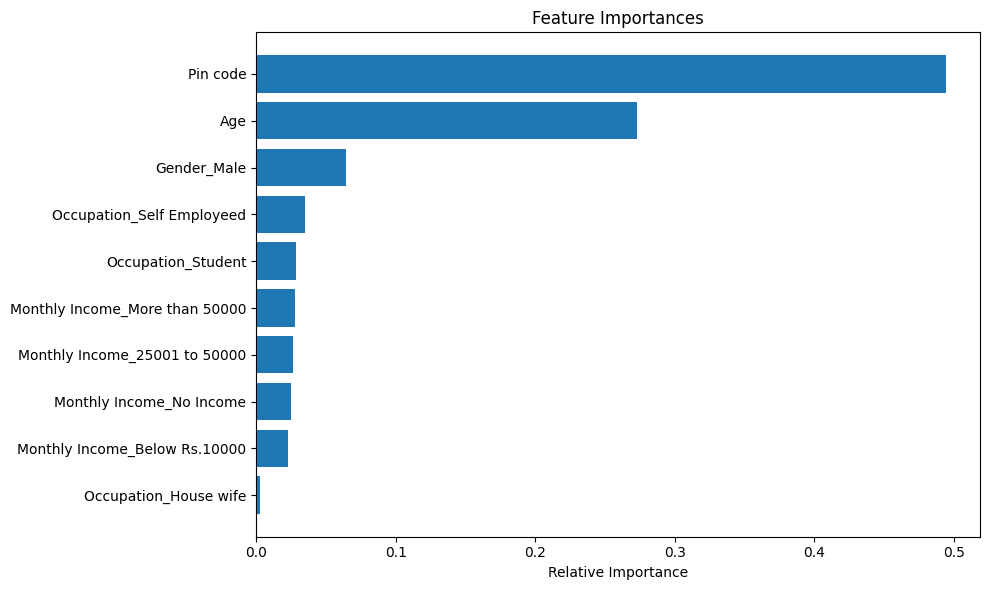

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier # Changed from RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report # Changed from r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np # Make sure numpy is imported for np.argsort

# Prepare the data for prediction

# Choose features and target. For illustrative purposes, we use a subset of features.
features = ['Age', 'Gender', 'Occupation', 'Monthly Income', 'Pin code']
target = 'Feedback'

# Subset the dataframe to include only the features that exist in the dataframe
available_features = [col for col in features if col in online_foods_clean.columns]
X = online_foods_clean[available_features].copy()
y = online_foods_clean[target].copy()

# Clean whitespace from the target variable labels
y = y.str.strip()

# Encode the target variable (Feedback) into numerical values
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Convert categorical variables in features into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Print dtype and some values of y_train to debug
print(f"y_train dtype before fit: {y_train.dtype}")
print(f"y_train unique values before fit: {np.unique(y_train)}")

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100) # Changed to Classifier
rf_model.fit(X_train, y_train)

# Predict on the test set and calculate the accuracy score and classification report
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Random Forest Classifier: {accuracy:.4f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Feature importance visualization using permutation importance like bar plot
importances = rf_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()

## **insight :** The gender distribution among customers indicates that male customers constitute the majority, accounting for 57.5%. This figure does not reflect a significant disparity when compared to female customers. The predominance of male customers may be influenced by generally lower cooking skills among men compared to women, as well as a psychological tendency among men to prefer more practical and convenient solutions.

# **Insight in each variable :**

### Distribution of Age : The most customer's age is 23 years old.
### Distribution of Gender : The most customer's gender is male.
### Distribution of Marital Status : The most customer's status is single.
### Distribution of Occupation : The most customer's occupation is student.
### Distribution of Monthly income : The most customer's monthly income is no income.
### Distribution of Educational qualifications : The most customer's Educational qualifications is graduated.
### Distribution of family size : The most customer's request is family size 3 which is likely medium size.
### Distribution of Delivery Status : The most customer's delivery status is delivered.
### Distribution of Feedback : The most customer's feedback is positive.


- Total orders: 285
- Total Positive feedback: 231
- Negative feedback:54
- Most total multiple orders : 22

1. Does Output influence Feedback?
- Assuming the output represents the current status of online food orders, positive feedback is associated with the "YES" output variable, indicating that customers are satisfied with orders that have been confirmed and delivered. In contrast, the "NO" outputs tend to receive more negative feedback than positive, suggesting customer dissatisfaction. Meanwhile, feedback related to orders with a "pending" status may vary, as these deliveries are still in progress or awaiting confirmation.

2. Which Ocupation ordered the most?
Students represent the largest demographic among online food service consumers. This trend is primarily attributed to their residential circumstances, as many students reside in boarding houses that lack kitchen facilities. Furthermore, their demanding academic and extracurricular schedules often limit the time available for meal preparation or dining out. The emergence of online food delivery platforms has significantly addressed these challenges by offering students convenient access to a diverse range of meal options, delivered promptly and efficiently.

3. What is the relationship of age and family size according to the data?
Age and family size both are the numeric variables of the data. According to correlation heatmap, the age and family size have 0.21 correlation value, which indicate a weak positive correlation. Maybe older individuals tend to have slightly larger families, but it’s not a strong trend.

4. What Top 3 most frequent location?
- 1. (12.977, 77.5773)
- 2. (12.9783, 77.6408)
- 3. (12.985, 77.5533) and (12.9698, 77.75)

According to the data, the latitude and longitude, the No. 1 most frequent location is 12.977 and 77.5773 which is the central of the city if looking at customer behavior, delivery logistics, or regional targeting. If the most frequent location clusters in the city center, it could mean:
- Hight-Density Demand Zone : The central area might be the online foods core market. It could prioritize inventory, faster delivery, or exclusive promotions there.
- Marketing Focus : Geo-targeted ads or events in that area could yield better ROI.
- Operational Efficiency : If many orders come from the same coordinates, it might optimize delivery routes or even consider a micro-fulfillment hub nearby.

